#### **Exercise 1**

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.  Try using different methods.  What works the best?





In [21]:
import pandas as pd

# Reading bank-sample data
path = 'data/sample_data_with_outliers.csv'

sample_df = pd.read_csv(path)

In [2]:
sample_df.head()

,Age,Income,Purchase
0,76,75071,1
1,88,62405,0
2,82,61914,1
3,81,66843,1
4,62,30492,0


<Axes: ylabel='Frequency'>

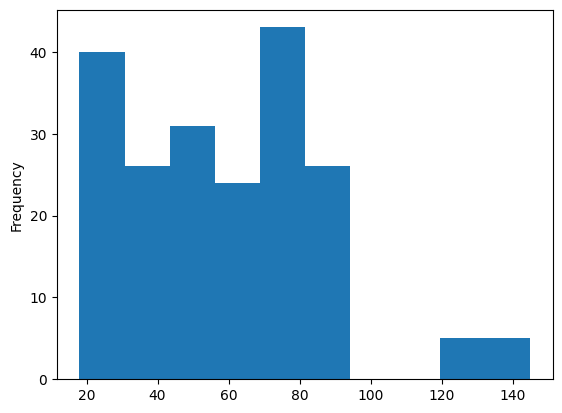

In [11]:
sample_df['Age'].plot.hist()

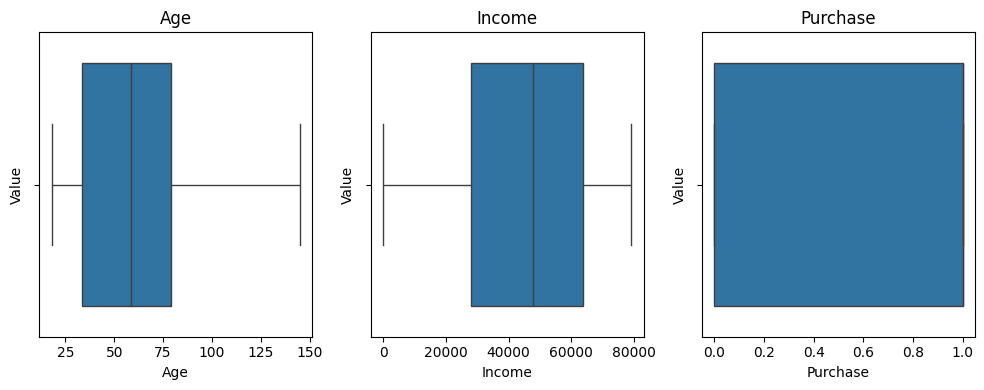

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['Age', 'Income', 'Purchase']

plt.figure(figsize=(10, 4))

for i, col in enumerate(selected_columns, 1):
    plt.subplot(1, len(selected_columns), i)
    sns.boxplot(x=sample_df[col], showfliers=True)  # Set showfliers=True to display outliers
    plt.title(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [22]:
sample_df = sample_df[sample_df['Age'] < 100]

In [23]:
sample_df['Age'].describe()

count    190.000000
mean      55.015789
std       23.644294
min       18.000000
25%       32.000000
50%       55.500000
75%       77.000000
max       94.000000
Name: Age, dtype: float64

In [27]:
sample_df = sample_df[sample_df['Income'] > 10000]

In [28]:
sample_df['Income'].describe()

count      180.000000
mean     49706.683333
std      17780.937491
min      20190.000000
25%      32445.500000
50%      51416.000000
75%      65564.000000
max      79040.000000
Name: Income, dtype: float64

#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

Logistic Regression without Scaling - Test Accuracy: 0.72


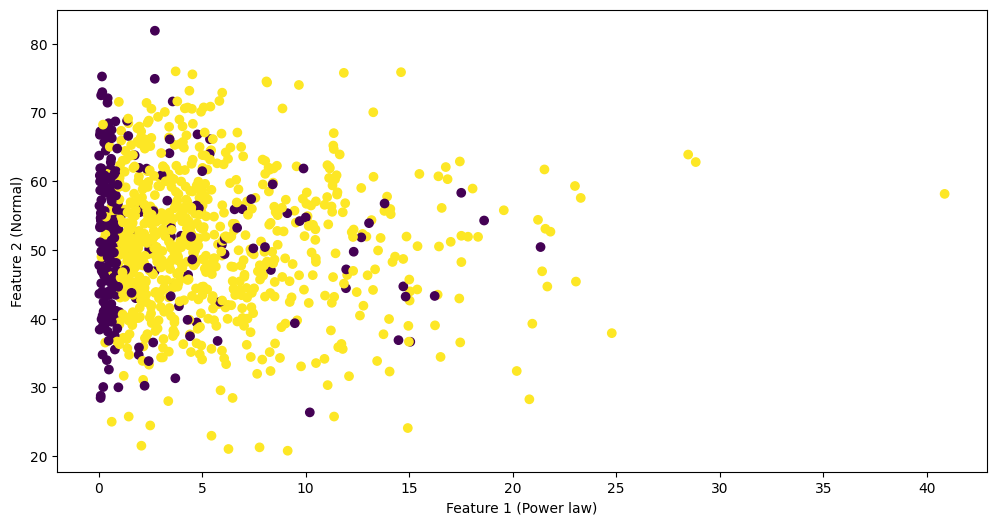

In [29]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


Logistic Regression with Scaling - Test Accuracy: 0.72
Accuracy: 0.72


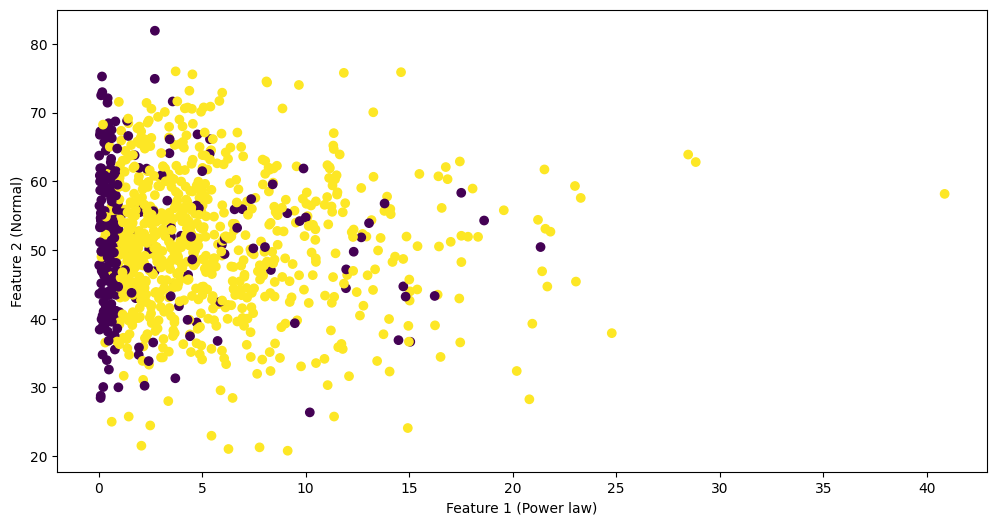

In [33]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Logistic Regression with Scaling - Test Accuracy: {pipeline.score(X_test, y_test):.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


Logistic Regression with Scaling - Test Accuracy: 0.93
Accuracy: 0.93


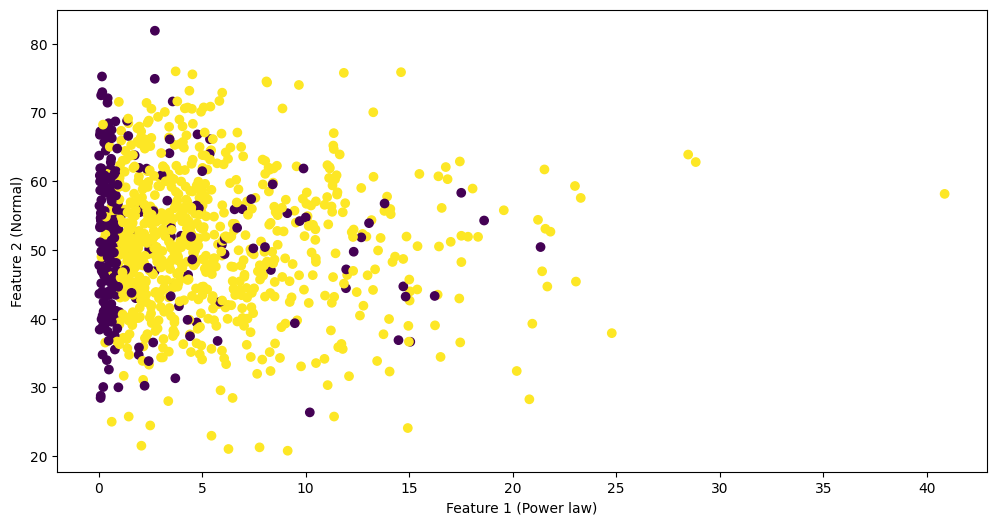

In [37]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FunctionTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion


# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ft = FunctionTransformer(lambda x: np.log(x+1))

pipeline = Pipeline([
    ('features', FeatureUnion([
        ('log_transform', ft),  # Apply log transformation to the first feature
        ('standard_scaler', StandardScaler(with_mean=False))  # Apply standard scaling to the second feature
    ])),
    ('model', LogisticRegression(max_iter=1000))
])
    

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Logistic Regression with Scaling - Test Accuracy: {pipeline.score(X_test, y_test):.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


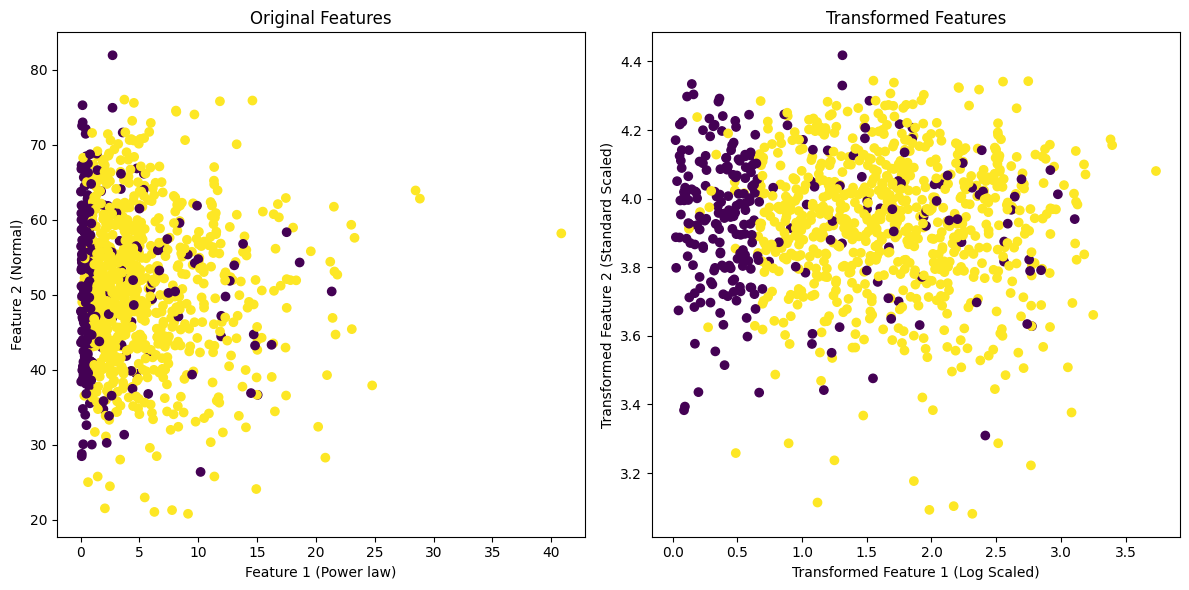

In [38]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]

# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function transformer for log transformation
ft = FunctionTransformer(lambda x: np.log(x + 1))

# Create a pipeline with FeatureUnion
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('log_transform', ft),  # Apply log transformation to the first feature
        ('standard_scaler', StandardScaler(with_mean=False))  # Apply standard scaling to the second feature
    ])),
    ('model', LogisticRegression(max_iter=1000))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Transform features using the fitted pipeline
X_transformed = pipeline.named_steps['features'].transform(X)

# Extract transformed features
X1_transformed = X_transformed[:, 0]
X2_transformed = X_transformed[:, 1]

# Plot original features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.title('Original Features')

# Plot transformed features
plt.subplot(1, 2, 2)
plt.scatter(X1_transformed, X2_transformed, c=y, cmap='viridis')
plt.xlabel('Transformed Feature 1 (Log Scaled)')
plt.ylabel('Transformed Feature 2 (Standard Scaled)')
plt.title('Transformed Features')

plt.tight_layout()
plt.show()


#### **Exercise 3**

The **Titanic dataset** (link to the data from [last week](../2-week2//data/titanic.csv)) contains the passenger list for all 768 passengers on the Titanic, as well as who survived. In this exercise, try using different methods for dealing with the nulls in the "age" column, and running the same classifier for the different methods (you might try a DecisionTreeClassifier, or a LogisticRegression classifier, or a SGDClassifier).  Which one gives the best result?  Why do you think that is?  Please only use the following columns for modeling: pclass, sex, age, sibsp, parch.  Be sure to try the following methods:

1. Fill forward, using 'ffill' in Pandas
2. Use a "mean" with a SimpleImputer
3. Use a "most_frequent" with a simple imputer
4. Use a KNN imputer from sklearn

In [39]:

titanic_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Load the Titanic dataset
path = '../2-week2/data/titanic.csv'
data = pd.read_csv(path)

data['age'].fillna(method='ffill', inplace=True)


/tmp/ipykernel_4977/2497080913.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['age'].fillna(method='ffill', inplace=True)


In [44]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

data.head()

data['ticket'] = pd.to_numeric(data['ticket'], errors='coerce')

# Assuming you have a DataFrame 'df' with the provided data
# Replace 'df' with the actual DataFrame variable name

# Drop irrelevant columns (e.g., 'name', 'ticket', 'cabin') and handle missing values
df = data.drop(['name', 'ticket', 'cabin'], axis=1)
df = df.dropna()

# Encode categorical variables ('sex' and 'embarked') using LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

# Assuming 'survived' is the target variable
X = df.drop('survived', axis=1)
y = df['survived']

# Initialize Logistic Regression and Decision Tree classifiers
dt_classifier = DecisionTreeClassifier()

# Perform 5-fold cross-validation for Logistic Regression

# Perform 5-fold cross-validation for Decision Tree
dt_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')

print("Decision Tree Cross-Validation Scores:", dt_scores)

print("Mean Accuracy - Decision Tree:", dt_scores.mean())

Decision Tree Cross-Validation Scores: [0.47328244 0.79310345 0.57471264 0.65517241 0.63601533]
Mean Accuracy - Decision Tree: 0.6264572548331433


In [46]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load the data
path = '../2-week2/data/titanic.csv'
data = pd.read_csv(path)

# Drop irrelevant columns (e.g., 'name', 'ticket', 'cabin') and handle missing values
df = data.drop(['name', 'ticket', 'cabin'], axis=1)
df = df.dropna()

# Encode categorical variables ('sex' and 'embarked') using LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

# Impute missing values for the 'age' column using the mean
imputer = SimpleImputer(strategy='mean')
df['age'] = imputer.fit_transform(df[['age']])

# Assuming 'survived' is the target variable
X = df.drop('survived', axis=1)
y = df['survived']

# Initialize Logistic Regression and Decision Tree classifiers
dt_classifier = DecisionTreeClassifier()

# Perform 5-fold cross-validation for Decision Tree
dt_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')

print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Mean Accuracy - Decision Tree:", dt_scores.mean())


Decision Tree Cross-Validation Scores: [0.49282297 0.70813397 0.68421053 0.71153846 0.625     ]
Mean Accuracy - Decision Tree: 0.6443411851306589


In [48]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load the data
path = '../2-week2/data/titanic.csv'
data = pd.read_csv(path)

# Drop irrelevant columns (e.g., 'name', 'ticket', 'cabin') and handle missing values
df = data.drop(['name', 'ticket', 'cabin'], axis=1)
df = df.dropna()

# Encode categorical variables ('sex' and 'embarked') using LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

# Impute missing values for the 'age' column using the mean
imputer = SimpleImputer(strategy='most_frequent')
df['age'] = imputer.fit_transform(df[['age']])

# Assuming 'survived' is the target variable
X = df.drop('survived', axis=1)
y = df['survived']

# Initialize Logistic Regression and Decision Tree classifiers
dt_classifier = DecisionTreeClassifier()

# Perform 5-fold cross-validation for Decision Tree
dt_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')

print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Mean Accuracy - Decision Tree:", dt_scores.mean())


Decision Tree Cross-Validation Scores: [0.49282297 0.70334928 0.67464115 0.71634615 0.60096154]
Mean Accuracy - Decision Tree: 0.6376242178873757


In [50]:
from sklearn.impute import KNNImputer, SimpleImputer
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load the data
path = '../2-week2/data/titanic.csv'
data = pd.read_csv(path)

# Drop irrelevant columns (e.g., 'name', 'ticket', 'cabin') and handle missing values
df = data.drop(['name', 'ticket', 'cabin'], axis=1)
df = df.dropna()

# Encode categorical variables ('sex' and 'embarked') using LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

# Impute missing values for the 'age' column using the mean
imputer = KNNImputer(n_neighbors=5, weights='uniform')
df['age'] = imputer.fit_transform(df[['age']])

# Assuming 'survived' is the target variable
X = df.drop('survived', axis=1)
y = df['survived']

# Initialize Logistic Regression and Decision Tree classifiers
dt_classifier = DecisionTreeClassifier()

# Perform 5-fold cross-validation for Decision Tree
dt_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')

print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Mean Accuracy - Decision Tree:", dt_scores.mean())


Decision Tree Cross-Validation Scores: [0.49282297 0.70334928 0.66507177 0.70192308 0.61538462]
Mean Accuracy - Decision Tree: 0.6357103422892897


#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data. 

In [53]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder



df_transformed = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10,2,3,1,6,9]
})


# Loop through each column in the original DataFrame
for col in df.columns:
    # Check if the column is of object or category type
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # Initialize the OneHotEncoder
        encoder = OneHotEncoder(sparse=False, drop='first')
        
        # Fit and transform the column and convert it to a DataFrame
        one_hot_encoded = encoder.fit_transform(df[[col]])
        one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([col]))
        
        # Concatenate the one-hot-encoded DataFrame to the transformed DataFrame
        df_transformed = pd.concat([df_transformed, one_hot_df], axis=1)
    else:
        # If the column is not categorical, just copy it to the transformed DataFrame
        df_transformed[col] = df[col].copy()

# Your code here

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [56]:
df_transformed.drop(['color', 'target'], axis=1, inplace=True)

In [57]:
df_transformed

,yumminess,color_green,color_red,target_grass,target_moon,target_sky
0,10,0.0,1.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,1.0
2,3,1.0,0.0,1.0,0.0,0.0
3,1,0.0,1.0,0.0,0.0,1.0
4,6,0.0,0.0,0.0,1.0,0.0
5,9,1.0,0.0,0.0,0.0,0.0


#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_unbalanced.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient. 
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet. 
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:

1. After pre-processing the data, perform an end-to-end analysis.  
2. Compare your results with and without re-balancing your classes.
3. Evaluate precision, recall, f1-score, and accuracy using 5-fold cross-validation.